In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle("/scratch/scratch8/madhurjindal/ACS-QG-Scratch/Datasets/processed/SQuAD1.1-Zhou/squad_ans_clue_style_info.pkl")

In [4]:
data = pd.DataFrame(data)

In [5]:
# Get the 3rd element of the tuple in data['clue_chunk']
def get_clue_chunk_3rd(data):
    try:
        return " ".join(data[2])
    except:
        return ""



In [6]:
data['clue_text'] = list(map(get_clue_chunk_3rd, data['clue_chunk']))

In [7]:
data

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
0,To whom did the Virgin Mary allegedly appear i...,"It is a replica of the grotto at Lourdes, Fran...",Saint Bernadette Soubirous,"(Who, 1)",NP,PERSON,3,NP,PERSON,5,3,"(PERSON, NP, [the, Virgin, Mary], 12, 14)",the Virgin Mary
1,What is in front of the Notre Dame Main Building?,Immediately in front of the Main Building and ...,a copper statue of Christ,"(What, 0)",UNK,UNK,5,NP,UNK,4,5,"(UNK, NP, [front, of, the, Main, Building], 2, 6)",front of the Main Building
2,The Basilica of the Sacred heart at Notre Dame...,Next to the Main Building is the Basilica of t...,the Main Building,"(Which, 6)",NP,FAC,3,NP,LOC,6,6,"(LOC, NP, [the, Basilica, of, the, Sacred, Hea...",the Basilica of the Sacred Heart
3,What is the Grotto at Notre Dame?,"Immediately behind the basilica is the Grotto,...",a Marian place of prayer and reflection,"(What, 0)",NP,UNK,7,NNP,ORG,2,1,"(ORG, NNP, [Grotto], 6, 6)",Grotto
4,What sits on top of the Main Building at Notre...,Atop the Main Building's gold dome is a golden...,a golden statue of the Virgin Mary,"(What, 0)",NP,UNK,7,NNP,FAC,5,1,"(FAC, NNP, [Main], 2, 2)",Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86630,In what US state did Kathmandu first establish...,KMC's first international relationship was est...,Oregon,"(What, 0)",NNP,GPE,1,JJ,UNK,7,1,"(UNK, JJ, [international], 3, 3)",international
86631,What was Yangon previously known as?,This activity has been further enhanced by est...,Rangoon,"(What, 0)",NNP,LOC,1,NNP,GPE,1,1,"(GPE, NNP, [Yangon], 25, 25)",Yangon
86632,With what Belorussian city does Kathmandu have...,This activity has been further enhanced by est...,Minsk,"(What, 0)",NNP,GPE,1,NNP,GPE,6,1,"(GPE, NNP, [City], 16, 16)",City
86633,In what year did Kathmandu create its initial ...,KMC's first international relationship was est...,1975,"(What, 0)",CD,DATE,1,JJ,UNK,4,1,"(UNK, JJ, [international], 3, 3)",international


In [8]:
data.to_csv("/scratch/scratch8/madhurjindal/ACS-QG-Scratch/Datasets/processed/SQuAD1.1-Zhou/squad_ans_clue_style_info.tsv", sep="\t", index=False)

# Question Type Demographics

In [9]:
data['question_type'].value_counts()

(What, 0)       49991
(Who, 1)         9382
(How, 2)         9197
(Which, 6)       6035
(When, 4)        5657
(Where, 3)       3673
(Why, 5)         1213
(Boolean, 7)      982
(Other, 8)        505
Name: question_type, dtype: int64

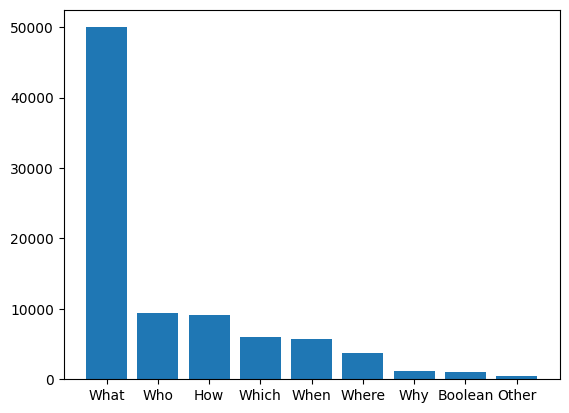

In [33]:
plt.bar(list(map(lambda x: x[0],data['question_type'].value_counts().index.tolist())), data['question_type'].value_counts())
plt.show()

# Answer POS Tag

In [11]:
data['answer_pos_tag'].nunique()

45

In [12]:
100*(data['answer_pos_tag'].value_counts()/data['answer_pos_tag'].shape[0])

UNK      31.761990
NP       29.059849
CD       11.037110
NNP       9.021758
NN        4.941421
JJ        3.358920
NNS       2.348935
VP        1.620592
PP        1.326254
NML       1.171582
QP        0.958042
S         0.649853
ADJP      0.636002
NNPS      0.483638
RB        0.235471
SBAR      0.233162
FW        0.226237
VBN       0.219311
ADVP      0.122352
VBG       0.113118
JJR       0.095804
VB        0.075027
VBD       0.055405
DT        0.038091
JJS       0.038091
VBP       0.025394
VBZ       0.024240
HYPH      0.018468
,         0.016160
-RRB-     0.016160
PDT       0.012697
IN        0.011543
UCP       0.010388
RBR       0.006926
SYM       0.005771
UH        0.004617
''        0.003463
PRP       0.003463
-LRB-     0.003463
.         0.002309
$         0.002309
LS        0.001154
POS       0.001154
RP        0.001154
:         0.001154
Name: answer_pos_tag, dtype: float64

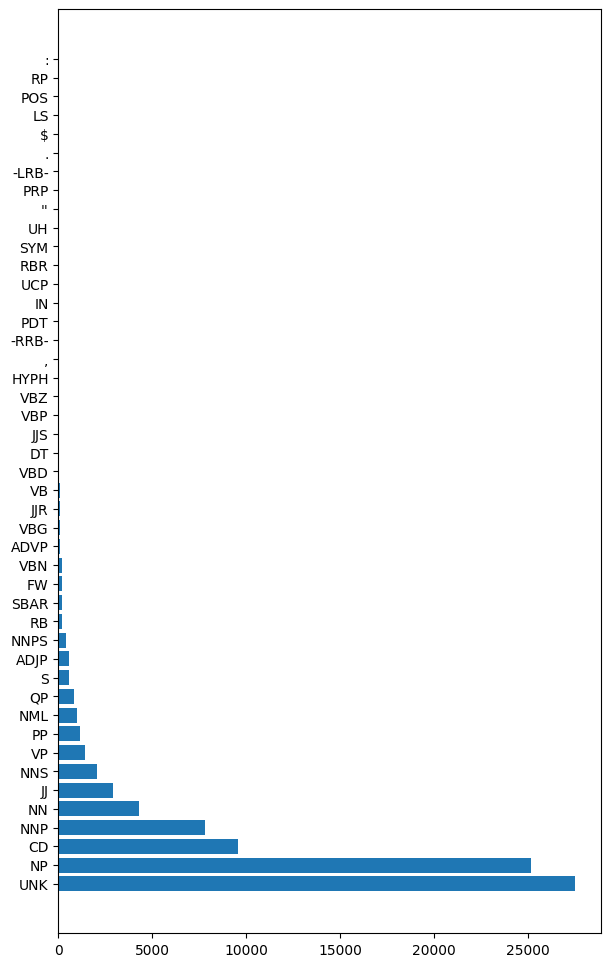

In [32]:
plt.figure(figsize=(7,12))
plt.barh(data['answer_pos_tag'].value_counts().index.tolist(), data['answer_pos_tag'].value_counts())
plt.show()

In [14]:
data[data['answer_pos_tag'] == ","]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
289,When did Beyonce take a hiatus in her career a...,Her marriage to rapper Jay Z and portrayal of ...,2010,"(When, 4)",",",DATE,1,CD,UNK,4,1,"(UNK, CD, [six], 44, 44)",six
797,When did she appear on the cover of GQ?,"In January 2013, GQ placed her on its cover, f...",2013,"(When, 4)",",",DATE,1,NNP,UNK,4,1,"(UNK, NNP, [GQ], 4, 4)",GQ
1105,In what year did many cities in Montana set he...,Many Montana cities set heat records during Ju...,2007,"(What, 0)",",",DATE,1,NP,UNK,5,2,"(UNK, NP, [heat, records], 4, 5)",heat records
9866,The newer version of the Wayback Machine inclu...,"In March 2011, it was said on the Wayback Mach...",2010,"(What, 0)",",",DATE,1,NML,WORK_OF_ART,7,2,"(WORK_OF_ART, NML, [Wayback, Machine], 9, 10)",Wayback Machine
12694,When was Mick Cornett first elected?,"Mick Cornett serves as Mayor, having first bee...",2004,"(When, 4)",",",DATE,1,NP,PERSON,5,2,"(PERSON, NP, [Mick, Cornett], 0, 1)",Mick Cornett
14870,What year did Hubway launch?,The bikeshare program called Hubway launched i...,2011,"(What, 0)",",",DATE,1,NNP,GPE,6,1,"(GPE, NNP, [Hubway], 4, 4)",Hubway
28419,When did Russia's United Shipbuilding Corporat...,"Speaking in St. Petersburg, Russia on 30 June ...",2016,"(When, 4)",",",DATE,1,NP,UNK,8,5,"(UNK, NP, [Russia, 's, United, Shipbuilding, C...",Russia 's United Shipbuilding Corporation
44936,In what year did the Korean church celebrate t...,All major seminaries associated with each deno...,2007,"(What, 0)",",",DATE,1,NP,UNK,4,3,"(UNK, NP, [the, 100th, class], 41, 43)",the 100th class
48406,When did Travel + Leisure list Yale as one of ...,"In 2011, Travel+Leisure listed the Yale campus...",2011,"(When, 4)",",",DATE,1,NNP,ORG,4,1,"(ORG, NNP, [Yale], 6, 6)",Yale
56287,What year saw the crash of the Miami housing m...,"In 2007, however, the housing market crashed c...",2007,"(What, 0)",",",DATE,1,NP,UNK,4,3,"(UNK, NP, [the, housing, market], 5, 7)",the housing market


In [15]:
data[data['answer_pos_tag'] == "."]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
32295,When was the Water Tribunal declared a cultura...,"In its long history, Valencia has acquired man...",2009,"(When, 4)",.,DATE,1,NP,ORG,4,3,"(ORG, NP, [the, Water, Tribunal], 40, 42)",the Water Tribunal
55102,Temperatures over 100 degrees will typically b...,The weaker influence of the Atlantic Ocean als...,.,"(What, 0)",.,UNK,1,NP,UNK,3,4,"(UNK, NP, [temperatures, in, the, Piedmont], 1...",temperatures in the Piedmont


In [16]:
data[data['answer_pos_tag'] == ":"]

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
78461,"What Proto-Indo-European term means ""skillful ...",The Middle Iranian ērān and aryān are oblique ...,*ar-yo-,"(What, 0)",:,UNK,1,NP,UNK,3,2,"(UNK, NP, [skillful, assembler], 52, 53)",skillful assembler


In [17]:
data[data['answer_pos_tag'] == '-LRB-']

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
80822,What did the old letters ⟨і⟩ and ⟨ѵ⟩ become?,Older letters of the Russian alphabet include ...,⟨и⟩,"(What, 0)",-LRB-,UNK,1,NP,UNK,4,3,"(UNK, NP, [⟨і⟩, and, ⟨ѵ⟩], 19, 21)",⟨і⟩ and ⟨ѵ⟩
80823,What did the old letter ⟨ѳ⟩ become?,Older letters of the Russian alphabet include ...,⟨ф⟩,"(What, 0)",-LRB-,UNK,1,-LRB-,UNK,3,1,"(UNK, -LRB-, [⟨ѳ⟩], 32, 32)",⟨ѳ⟩
80825,What did the old letter ⟨ѭ⟩ become?,Older letters of the Russian alphabet include ...,⟨ю⟩,"(What, 0)",-LRB-,UNK,1,FW,UNK,4,1,"(UNK, FW, [⟨ѭ⟩], 52, 52)",⟨ѭ⟩


In [18]:
data[data['answer_pos_tag'] == '$']

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
46498,What is the daily cost for most drivers to ope...,"With a few exceptions, motorists are required ...",£10,"(What, 0)",$,UNK,1,NN,UNK,6,1,"(UNK, NN, [zone], 18, 18)",zone
83483,By what vote did the Supreme Court determine i...,"In Engel v. Vitale, 370 U.S. 421 (1962), the C...",6-1,"(What, 0)",$,UNK,1,VP,UNK,8,5,"(UNK, VP, [compose, an, official, school, pray...",compose an official school prayer


# ANSWER NER TAG

In [21]:
curr_col = 'answer_ner_tag'

In [22]:
data[curr_col].nunique()

19

In [23]:
100*(data[curr_col].value_counts()/data[curr_col].shape[0])

UNK            65.853293
DATE            8.898251
ORG             5.706701
PERSON          5.637444
CARDINAL        4.868702
GPE             3.834478
NORP            1.382813
LOC             0.694869
WORK_OF_ART     0.651007
FAC             0.592139
QUANTITY        0.458244
PERCENT         0.270099
EVENT           0.265482
ORDINAL         0.192763
PRODUCT         0.171986
MONEY           0.169677
LAW             0.145438
TIME            0.126969
LANGUAGE        0.079644
Name: answer_ner_tag, dtype: float64

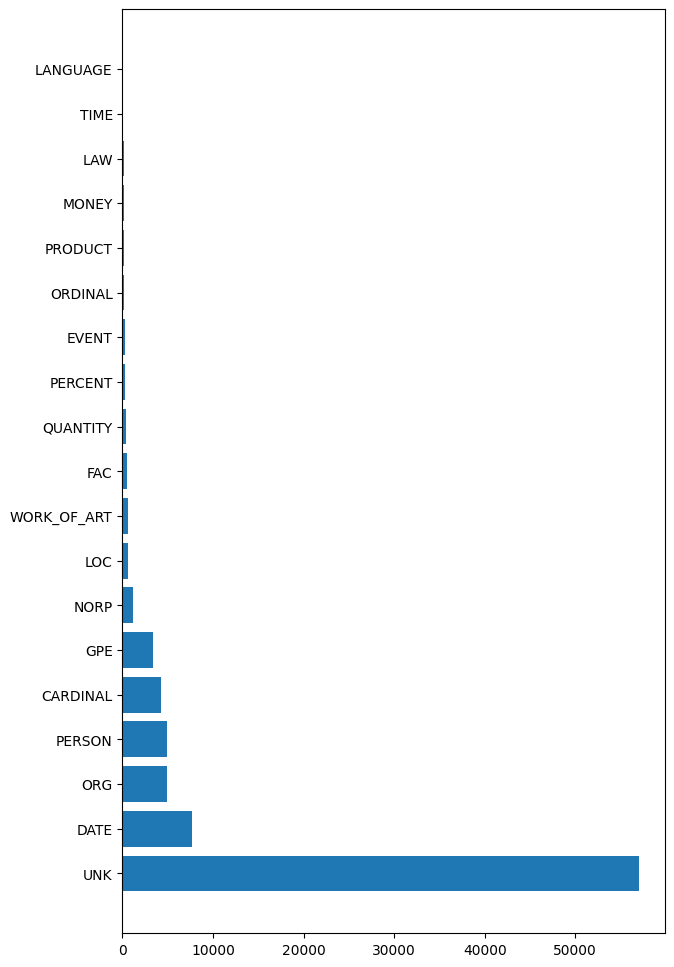

In [31]:
plt.figure(figsize=(7,12))
plt.barh(data[curr_col].value_counts().index.tolist(), data[curr_col].value_counts())
plt.show()

# ANSWER LENGTH

In [36]:
data['answer_length'].value_counts()

1     29681
2     22184
3     13067
4      6366
5      4013
6      2518
7      1839
8      1368
9       969
10      778
11      634
12      535
13      434
14      384
15      342
16      239
17      234
18      217
19      157
20      148
21      128
22      117
23       92
24       61
25       54
26       33
27       22
28       10
30        6
29        3
43        1
31        1
Name: answer_length, dtype: int64

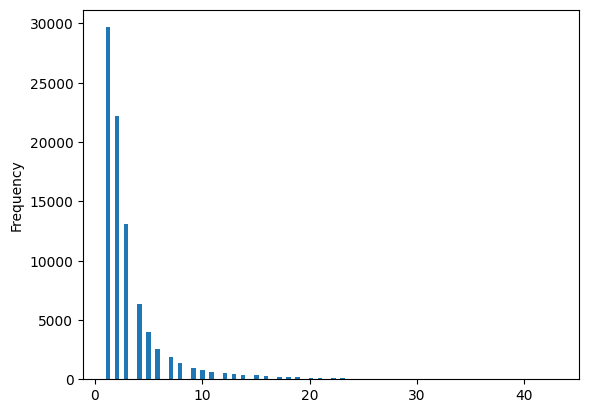

In [40]:
data['answer_length'].plot(kind='hist', bins=100)
plt.show()

In [41]:
data

,question,ans_sent,answer_text,question_type,answer_pos_tag,answer_ner_tag,answer_length,clue_pos_tag,clue_ner_tag,clue_answer_dep_path_len,clue_length,clue_chunk,clue_text
0,To whom did the Virgin Mary allegedly appear i...,"It is a replica of the grotto at Lourdes, Fran...",Saint Bernadette Soubirous,"(Who, 1)",NP,PERSON,3,NP,PERSON,5,3,"(PERSON, NP, [the, Virgin, Mary], 12, 14)",the Virgin Mary
1,What is in front of the Notre Dame Main Building?,Immediately in front of the Main Building and ...,a copper statue of Christ,"(What, 0)",UNK,UNK,5,NP,UNK,4,5,"(UNK, NP, [front, of, the, Main, Building], 2, 6)",front of the Main Building
2,The Basilica of the Sacred heart at Notre Dame...,Next to the Main Building is the Basilica of t...,the Main Building,"(Which, 6)",NP,FAC,3,NP,LOC,6,6,"(LOC, NP, [the, Basilica, of, the, Sacred, Hea...",the Basilica of the Sacred Heart
3,What is the Grotto at Notre Dame?,"Immediately behind the basilica is the Grotto,...",a Marian place of prayer and reflection,"(What, 0)",NP,UNK,7,NNP,ORG,2,1,"(ORG, NNP, [Grotto], 6, 6)",Grotto
4,What sits on top of the Main Building at Notre...,Atop the Main Building's gold dome is a golden...,a golden statue of the Virgin Mary,"(What, 0)",NP,UNK,7,NNP,FAC,5,1,"(FAC, NNP, [Main], 2, 2)",Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86630,In what US state did Kathmandu first establish...,KMC's first international relationship was est...,Oregon,"(What, 0)",NNP,GPE,1,JJ,UNK,7,1,"(UNK, JJ, [international], 3, 3)",international
86631,What was Yangon previously known as?,This activity has been further enhanced by est...,Rangoon,"(What, 0)",NNP,LOC,1,NNP,GPE,1,1,"(GPE, NNP, [Yangon], 25, 25)",Yangon
86632,With what Belorussian city does Kathmandu have...,This activity has been further enhanced by est...,Minsk,"(What, 0)",NNP,GPE,1,NNP,GPE,6,1,"(GPE, NNP, [City], 16, 16)",City
86633,In what year did Kathmandu create its initial ...,KMC's first international relationship was est...,1975,"(What, 0)",CD,DATE,1,JJ,UNK,4,1,"(UNK, JJ, [international], 3, 3)",international


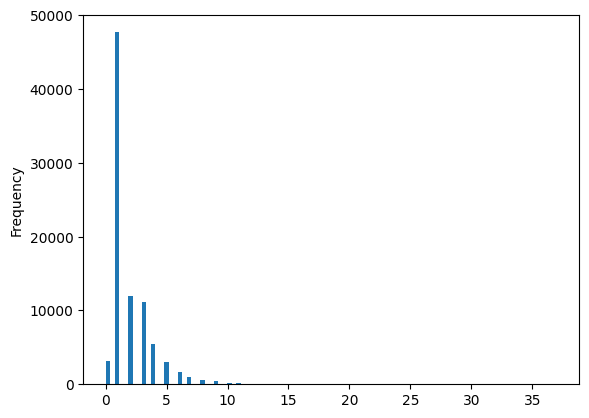

In [42]:
data['clue_length'].plot(kind='hist', bins=100)
plt.show()

In [48]:
data['clue_answer_dep_path_len'].value_counts().sort_values(ascending=False)

4      15756
5      13904
3      12467
6      10053
2       8207
       ...  
86         1
89         1
85         1
127        1
74         1
Name: clue_answer_dep_path_len, Length: 92, dtype: int64

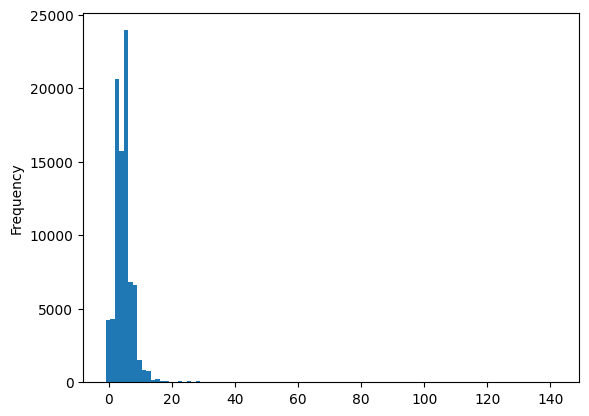

In [45]:
data['clue_answer_dep_path_len'].plot(kind='hist', bins=100)
plt.show()

# Querstion Length

In [53]:
data['question_length'] = data['question'].apply(lambda x: len(x.split()))

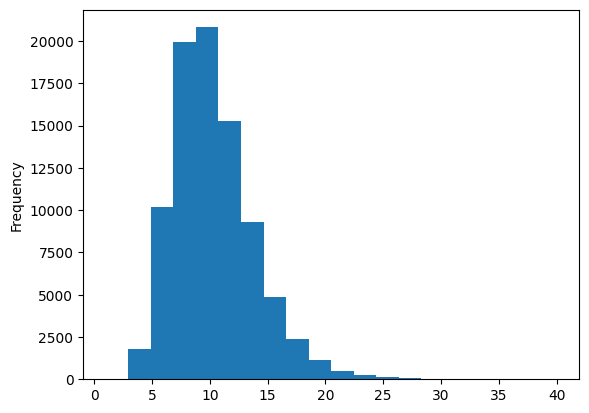

In [56]:
data['question_length'].plot(kind='hist', bins=20)
plt.show()

https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2762006.pdf
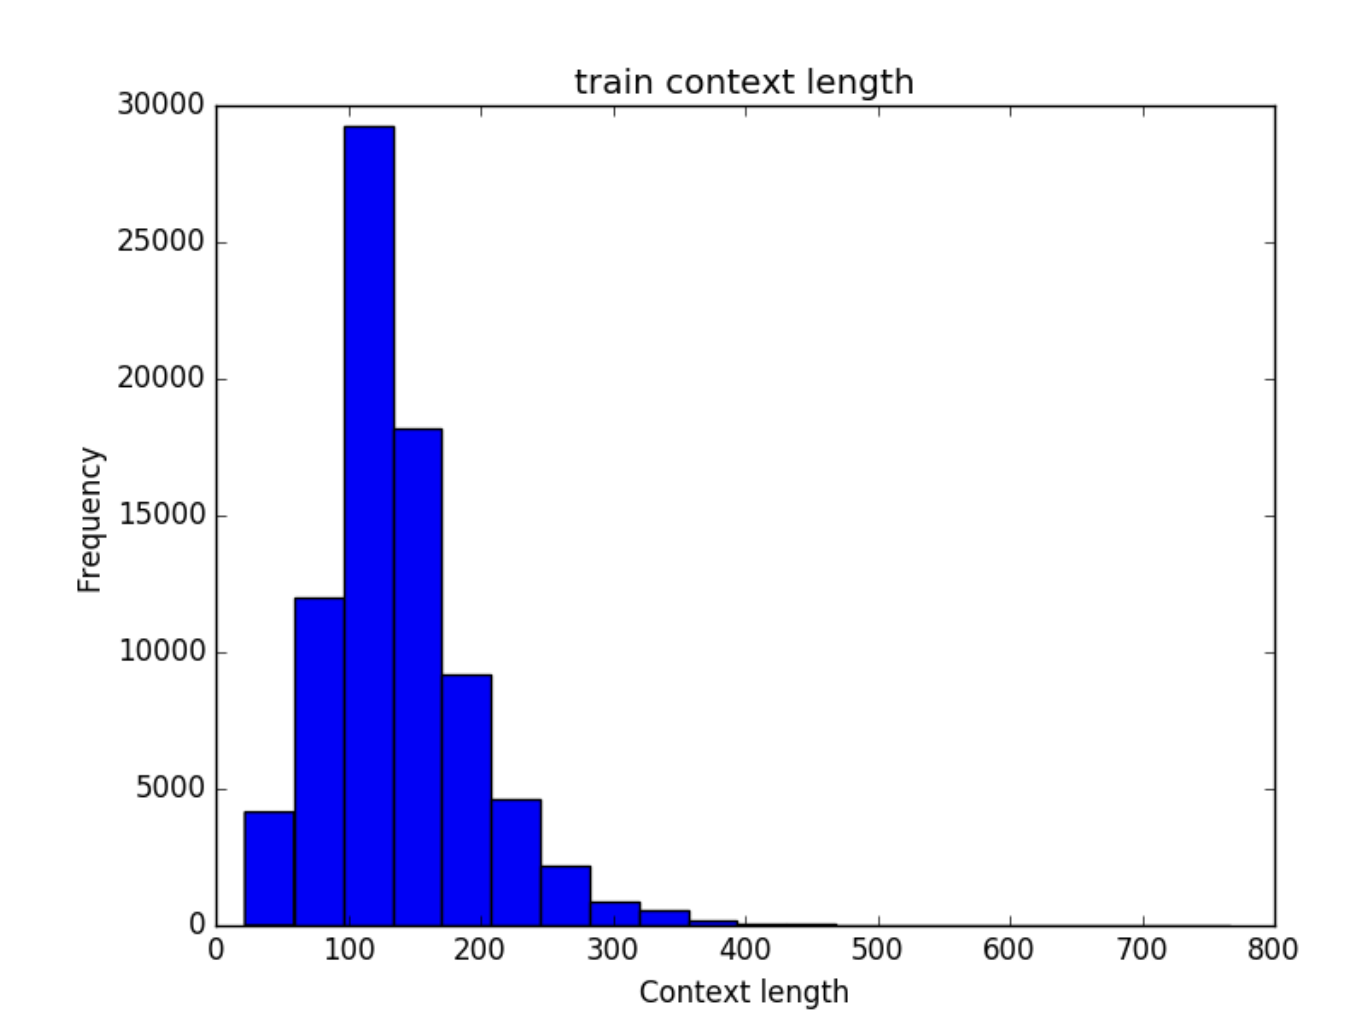

https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/reports/default/15848195.pdf

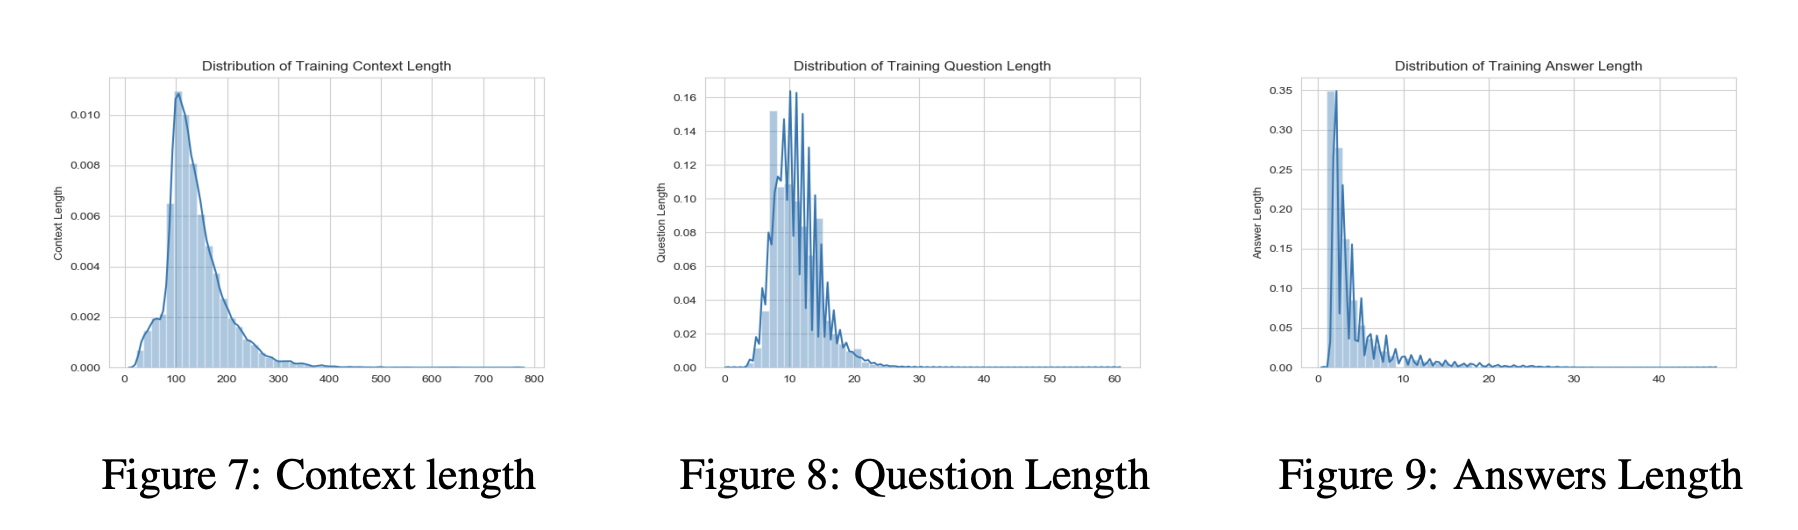

In [2]:
import codecs
with codecs.open("/scratch/scratch8/madhurjindal/ACS-QG-Scratch/Datasets/original/SQuAD1.1-Zhou/dev.txt", encoding="utf-8") as fh:
        lines = fh.readlines()

In [4]:
line = lines[0]

In [6]:
fields = line.strip().split("\t")
ans_sent = fields[6]
answer_text = fields[8]
question = fields[9]

In [7]:
fields

['His armies quickly took Heisui , Ganzhou , and Suzhou -LRB- not the Suzhou in Jiangsu province -RRB- , and in the autumn he took Xiliang-fu -LSB- disambiguation needed -RSB- .',
 '22 22',
 '(ROOT (S (S (NP (PRP$ His) (NNS armies)) (ADVP (RB quickly)) (VP (VBD took) (NP (NNP Heisui) (, ,) (NNP Ganzhou) (, ,) (CC and) (NNP Suzhou)) (PRN (-LRB- -LRB-) (NP (NP (RB not) (DT the) (NNP Suzhou)) (PP (IN in) (NP (NNP Jiangsu) (NN province)))) (-RRB- -RRB-)))) (, ,) (CC and) (S (PP (IN in) (NP (DT the) (NN autumn))) (NP (PRP he)) (VP (VBD took) (SBAR (S (NP (NNP Xiliang-fu) (NNP -LSB-) (NN disambiguation)) (VP (VBD needed) (NP (NNS -RSB-))))))) (. .)))',
 'PRP$ NNS RB VBD NNP , NNP , CC NNP -LRB- RB DT NNP IN NNP NN -RRB- , CC IN DT NN PRP VBD NN -LRB- NN VBN -RRB- .',
 'O O O O PERSON O LOCATION O O LOCATION O O O LOCATION O LOCATION O O O O O O O O O MISC O O O O O',
 'What season was it when Genghis Khan took Xiliang-fu from the Tanguts ?',
 'His armies quickly took Heisui, Ganzhou, and Suz

In [8]:
answer_text

'autumn'

In [10]:
ans_sent

'His armies quickly took Heisui, Ganzhou, and Suzhou (not the Suzhou in Jiangsu province), and in the autumn he took Xiliang-fu[disambiguation needed].'